# Aprendizagem por Reforço com Q-Learning


# 1.0 Conhecendo o ambiente

In [10]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 2.2 MB/s eta 0:00:003.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 KB 1.2 MB/s eta 0:00:001.2 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 917.1 kB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached aiosignal-1.2.0-py3-none-any.whl (8.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 KB 906.0 kB/s eta 0:00:001m935.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.3/305.3 KB 931.8 kB/s eta 0:00:001m957.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 1.2 MB/s eta 0:00:001.6 MB/s eta 0:00:01
  Created wheel for pysimdjson: 

In [11]:
import gym
import random

In [14]:
env = gym.make('Taxi-v3').env

In [15]:
env.render()

AttributeError: 'TaxiEnv' object has no attribute 's'

In [16]:
env.reset()

427

In [17]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [18]:
# 0 = south, 1 = north, 2 = east, 3 = west, 4 = pickup, 5 = dropoff
print("Total de Ações: {}".format(env.action_space))

Total de Ações: Discrete(6)


In [19]:
print("Total de Estados: {}".format(env.observation_space))

Total de Estados: Discrete(500)


In [20]:
len(env.P)

500

In [21]:
env.P

{0: {0: [(1.0, 100, -1, False)],
  1: [(1.0, 0, -1, False)],
  2: [(1.0, 20, -1, False)],
  3: [(1.0, 0, -1, False)],
  4: [(1.0, 16, -1, False)],
  5: [(1.0, 0, -10, False)]},
 1: {0: [(1.0, 101, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 21, -1, False)],
  3: [(1.0, 1, -1, False)],
  4: [(1.0, 17, -1, False)],
  5: [(1.0, 1, -10, False)]},
 2: {0: [(1.0, 102, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 22, -1, False)],
  3: [(1.0, 2, -1, False)],
  4: [(1.0, 18, -1, False)],
  5: [(1.0, 2, -10, False)]},
 3: {0: [(1.0, 103, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 23, -1, False)],
  3: [(1.0, 3, -1, False)],
  4: [(1.0, 19, -1, False)],
  5: [(1.0, 3, -10, False)]},
 4: {0: [(1.0, 104, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 24, -1, False)],
  3: [(1.0, 4, -1, False)],
  4: [(1.0, 4, -10, False)],
  5: [(1.0, 4, -10, False)]},
 5: {0: [(1.0, 105, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 25, -1, False)],
  3: [(1.0, 5, -1, False)

In [22]:
# Função env.encode(taxi_linha,taxi_coluna,passageiro_saida,passageiro_chegada)
env.encode(4, 2, 2, 3)
# Essa conformação é o estado: 451

451

In [23]:
env.s = 451
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [24]:
# Tabela inicial de recompensas "P", com estados e ações
# Este dicionário tem a estrutura {action: [(probability, nextstate, reward, done)]}. Ou seja:
# ação 0 (sul) possui probabilidade 1 de executar essa ação, próximo estado 451, recompensa -1 e se alcançou o final.
# ação 1 (norte) possui probabilidade 1 de executar essa ação, próximo estado 351, recompensa -1 e se alcançou o final.
# ação 2 (leste) possui probabilidade 1 de executar essa ação, próximo estado 451, recompensa -1 e se alcançou o final.
# ação 3 (oeste) possui probabilidade 1 de executar essa ação, próximo estado 431, recompensa -1 e se alcançou o final.
# ação 4 (pegar) possui probabilidade 1 de executar essa ação, próximo estado 451, recompensa -10 e se alcançou o final.
# ação 5 (largar) possui probabilidade 1 de executar essa ação, próximo estado 451, recompensa -10 e se alcançou o final.
env.P[451]

{0: [(1.0, 451, -1, False)],
 1: [(1.0, 351, -1, False)],
 2: [(1.0, 451, -1, False)],
 3: [(1.0, 431, -1, False)],
 4: [(1.0, 451, -10, False)],
 5: [(1.0, 451, -10, False)]}

In [25]:
env.s = 479
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Obs.: Para sair do estado 451 até 479 tem que realizar todo o somatório (13) de passos (-1) até o final 20: resultando em +7


In [26]:
env.P[479]

{0: [(1.0, 479, -1, False)],
 1: [(1.0, 379, -1, False)],
 2: [(1.0, 499, -1, False)],
 3: [(1.0, 479, -1, False)],
 4: [(1.0, 479, -10, False)],
 5: [(1.0, 475, 20, True)]}

# 2.0 Usando ações aleatórias (sem o Aprendizado por Reforço)


In [27]:
env.s = 484  

epochs = 0   
penalties = 0   

frames = [] 

done = False

while not done:
    action = env.action_space.sample()  
    state, reward, done, info = env.step(action)  

    if reward == -10:  
        penalties += 1
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Total de ações executadas: {}".format(epochs))
print("Total de penalizações recebidas: {}".format(penalties))

Total de ações executadas: 2093
Total de penalizações recebidas: 686


## 2.1 Mostrando a animação dos movimentos realizados


In [28]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 2093
State: 475
Action: 5
Reward: 20


In [17]:
env.s = 484
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


# 3.0 Treinamento com o algoritmo Q-Learning


Q-learning:

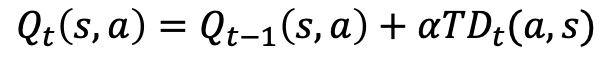

In [101]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

In [102]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [103]:
q_table[451]

array([0., 0., 0., 0., 0., 0.])

In [104]:
%%time
from IPython.display import clear_output

# Hiperparâmetros:
alpha = 0.05     
gamma = 0.6     
epsilon = 0.1   

for i in range(100000):
  estado = env.reset()

  penalidades, recompensa = 0, 0
  done = False
  while not done:
    # Qnd o valor de "random.uniform(0, 1)" for menor que 0.1 (epsilon),    
    if random.uniform(0, 1) < epsilon:
      # executará uma ação aleatória (Exploração).
      acao = env.action_space.sample()
    # caso contrário, 
    else:
      # executará a ação de maior valor, conforme tabela q_table e estado informado (Aproveitamento).
      acao = np.argmax(q_table[estado])

    proximo_estado, recompensa, done, info = env.step(acao)

    q_antigo = q_table[estado, acao]
    proximo_maximo = np.max(q_table[proximo_estado])

    q_novo = (1 - alpha) * q_antigo + alpha * (recompensa + gamma * proximo_maximo)
    q_table[estado, acao] = q_novo

    if recompensa == -10:
      penalidades += 1

    estado = proximo_estado

  if i % 100 == 0:
    clear_output(wait=True)
    print('Episódio: ', i)

print('Treinamento concluído')

Episódio:  99900
Treinamento concluído
CPU times: user 1min 6s, sys: 12.9 s, total: 1min 19s
Wall time: 1min 8s


In [105]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.41833853,  -2.3639302 ,  -2.41834433,  -2.36380368,
         -2.27325184, -11.35706703],
       [ -1.87007314,  -1.45032142,  -1.86999878,  -1.45027566,
         -0.7504    , -10.44887145],
       ...,
       [ -0.92480014,   0.41567326,  -0.92237149,  -1.00436149,
         -3.69780285,  -1.87533486],
       [ -2.13240695,  -2.11911838,  -2.13135044,  -2.11898285,
         -5.02496249,  -2.40192594],
       [  1.18903451,   0.65181112,   1.41058852,  11.        ,
         -1.57387853,  -1.68223934]])

In [106]:
q_table[451]

array([-2.48410603, -2.48236504, -2.48347335, -2.48236514, -8.75423422,
       -8.48406693])

# 4.0 Testando a tabela Q passo a passo
(Agora a tabela Q já está aprendida!)

In [107]:
env.s = 451
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [108]:
# Sendo: 0 = south, 1 = north, 2 = east, 3 = west, 4 = pickup, 5 = dropoff
q_table[451]

array([-2.48410603, -2.48236504, -2.48347335, -2.48236514, -8.75423422,
       -8.48406693])

In [109]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [110]:
print(env.s)

351


In [111]:
q_table[env.s]

array([-2.47828824, -2.47061343, -2.4762713 , -2.47061343, -9.64815422,
       -8.15314723])

In [112]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [113]:
q_table[env.s]

array([ -2.48203119,  -2.48203748,  -2.48172356,  -2.4510224 ,
       -11.42183956, -11.40728275])

In [114]:
env.step(3)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


In [115]:
q_table[env.s]

array([ -2.47053414,  -2.47046043,  -2.47024559,  -2.41837066,
       -11.42467536, -11.44501776])

In [116]:
env.step(3)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


In [117]:
q_table[env.s]

array([ -2.3639511 ,  -2.45100564,  -2.45097066,  -2.41834807,
       -11.41357764, -11.4149479 ])

In [118]:
env.step(0)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


E assim o taxi segue as maiores recompensas...
Ou seja, até pegar o passageiro e o deixar em seu destino.

In [119]:
env.s = 479
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


In [120]:
q_table[479]

array([11.        ,  5.6       ,  5.59999999, 11.        ,  2.        ,
       20.        ])

In [121]:
env.step(5)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [122]:
print(env.s)

475


In [123]:
q_table[475]

array([0., 0., 0., 0., 0., 0.])

# 5.0 Testando o agente treinado (Avaliação)
(Resolvendo o problema com a aprendizagem obtida (q_table))

In [124]:
total_penalidades = 0
episodios = 50
frames = []

for ep in range(episodios):
  estado = env.reset()
  penalidades, recompensa = 0, 0
  done = False
  while not done:
    acao = np.argmax(q_table[estado])
    estado, recompensa, done, info = env.step(acao)

    if recompensa == -10:
      penalidades += 1
    
    frames.append({
        'frame': env.render(mode='ansi'),
        'episode': ep,
        'state': estado,
        'action': acao,
        'reward': recompensa
    })

  total_penalidades += penalidades

print('Episódios', episodios)
print('Penalidades', total_penalidades)

Episódios 50
Penalidades 0


In [125]:
frames

[{'action': 1,
  'episode': 0,
  'frame': '+---------+\n|\x1bR\x1b: | : :G|\n| : | : : |\n| :\x1b \x1b: : : |\n| | : | : |\n|\x1bY\x1b| : |B: |\n+---------+\n  (North)\n',
  'reward': -1,
  'state': 222},
 {'action': 1,
  'episode': 0,
  'frame': '+---------+\n|\x1bR\x1b: | : :G|\n| :\x1b \x1b| : : |\n| : : : : |\n| | : | : |\n|\x1bY\x1b| : |B: |\n+---------+\n  (North)\n',
  'reward': -1,
  'state': 122},
 {'action': 3,
  'episode': 0,
  'frame': '+---------+\n|\x1bR\x1b: | : :G|\n|\x1b \x1b: | : : |\n| : : : : |\n| | : | : |\n|\x1bY\x1b| : |B: |\n+---------+\n  (West)\n',
  'reward': -1,
  'state': 102},
 {'action': 1,
  'episode': 0,
  'frame': '+---------+\n|\x1b\x1bR\x1b\x1b: | : :G|\n| : | : : |\n| : : : : |\n| | : | : |\n|\x1bY\x1b| : |B: |\n+---------+\n  (North)\n',
  'reward': -1,
  'state': 2},
 {'action': 4,
  'episode': 0,
  'frame': '+---------+\n|\x1bR\x1b: | : :G|\n| : | : : |\n| : : : : |\n| | : | : |\n|\x1bY\x1b| : |B: |\n+---------+\n  (Pickup)\n',
  'reward': -1,
  

In [126]:
frames[0]

{'action': 1,
 'episode': 0,
 'frame': '+---------+\n|\x1bR\x1b: | : :G|\n| : | : : |\n| :\x1b \x1b: : : |\n| | : | : |\n|\x1bY\x1b| : |B: |\n+---------+\n  (North)\n',
 'reward': -1,
 'state': 222}

In [ ]:
from time import sleep

for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print(f"Episódio: {frame['episode']}")
  print('Estado:', frame['state'])
  print('Ação:', frame['action'])
  print('Recompensa:', frame['reward'])
  sleep(1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Episódio: 15
Estado: 479
Ação: 0
Recompensa: -1
